# LDA


In [24]:
pip install gensim

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [8]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
 
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
 
 
 
 # Prepare data
PATH = "/home/featurize/datas/movie_val1.csv"
 
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #Read the content line by line
data_set=[] #Creating a list of stored participles
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#Read each line of participle
        result.append(w)
    data_set.append(result)
print(data_set)
 
 

[['id,text,genre'], ['0,"eady', 'dead,', 'maybe', 'even', 'wishing', 'he', 'was.', 'INT.', '2ND', 'FLOOR', 'HALLWAY', 'THREE', 'NIGHT', 'The', 'Orderly', 'leads', 'Liza', 'to', 'a', 'door.', 'ORDERLY', 'In', 'here.', 'White', 'guy', 'in', 'his', '30s.', 'He', 'opens', 'the', 'door', 'and', 'they', 'step', 'into...', 'ROOM', 'THREE', "There's", 'a', 'white', 'guy', 'in', 'his', 'mid', '30s.', 'He', 'looks', 'up.', 'Wild.', 'Straight', 'jacketed.', 'Not', 'Jerry.', "Liza's", 'reached', 'the', 'end', 'of', 'her', 'rope.', 'She', 'just', 'shakes', 'her', 'head.', 'INT.', 'DECREPIT', 'HOSPITAL', 'ROOM', 'NIGHT', 'Balled', 'up.', 'Fetal.', 'Not', 'really', 'all', 'there.', 'Head', 'pressed', 'to', 'the', 'cement,', 'he', 'tries', 'to', 'sing', 'to', 'himself.', 'JERRY', 'Blue', 'moon...', 'Blue', 'moon...', 'INT.', '2ND', 'FLOOR', 'HALLWAY', 'THREE', 'NIGHT', 'Liza', 'just', 'stands', 'there,', 'leaning', 'on', 'a', 'rail', 'on', 'the', 'wall.', 'The', 'Orderly', "isn't", 'sure', "what's", '

In [9]:
dictionary = corpora.Dictionary(data_set)  # construct (sth abstract) document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
#Lda = gensim.models.ldamodel.LdaModel  # Creating LDA Objects
 


In [10]:
#Calculating Confusion
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)
 


In [11]:
#Calculate coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()


[(0, '0.037*"the" + 0.022*",," + 0.017*"a" + 0.016*"to" + 0.015*"and" + 0.012*"of" + 0.009*"in" + 0.008*"I" + 0.008*"is" + 0.007*"you"')]
0.6232716335711611
[(0, '0.186*",," + 0.000*"Carolco" + 0.000*"disgustingly" + 0.000*"HAYWORTH" + 0.000*"HOLLYWOOD" + 0.000*"RITA" + 0.000*"TM" + 0.000*"Pictures" + 0.000*"Inc." + 0.000*"Hayworth"'), (1, '0.042*"the" + 0.019*"a" + 0.018*"to" + 0.017*"and" + 0.014*"of" + 0.010*"in" + 0.009*"I" + 0.009*"is" + 0.007*"you" + 0.007*"his"')]
0.3021546661527281
[(0, '0.002*"SCENE" + 0.002*"ON" + 0.001*"NICK" + 0.001*"BACK" + 0.001*"AND" + 0.001*"STU" + 0.001*"AT" + 0.001*"AS" + 0.000*"HER" + 0.000*"MS"'), (1, '0.240*",," + 0.001*"PARRISH" + 0.000*"Parrish" + 0.000*"EVERETT" + 0.000*"ROMA" + 0.000*"Jen" + 0.000*"SEXY" + 0.000*"ANNOUNCER" + 0.000*"JEN" + 0.000*"AUSTIN"'), (2, '0.045*"the" + 0.020*"a" + 0.019*"to" + 0.019*"and" + 0.015*"of" + 0.010*"in" + 0.010*"I" + 0.009*"is" + 0.008*"you" + 0.008*"his"')]
0.4909063594292988
[(0, '0.002*"SCENE" + 0.001*"NICK

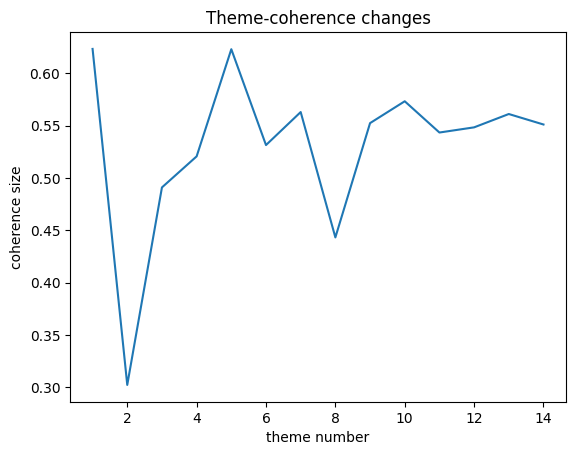

In [12]:
 
# Plotting a line graph of the degree of confusion
x = range(1,15)
# z = [perplexity(i) for i in x]
y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('theme number')
plt.ylabel('coherence size')
#plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('Theme-coherence changes')
plt.show()

In [13]:
from gensim.models import LdaModel
import pandas as pd
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
 


In [14]:
# Prepare data
PATH = "/home/featurize/datas/movie_val1.csv"
 
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #Creating a list of stored participles
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#Read each line of participle
        result.append(w)
    data_set.append(result)
 
dictionary = corpora.Dictionary(data_set)  # build document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
print(result_list)

[(0, '0.003*"SCENE" + 0.002*"ON" + 0.002*"." + 0.001*"NICK" + 0.001*"AND" + 0.001*"STU" + 0.001*"HER" + 0.001*"AS" + 0.001*"BACK" + 0.001*"N"'), (1, '0.048*"the" + 0.022*"a" + 0.021*"to" + 0.020*"and" + 0.016*"of" + 0.011*"in" + 0.011*"I" + 0.010*"is" + 0.009*"you" + 0.008*"his"'), (2, '0.002*"JACK" + 0.001*"MASON" + 0.001*"MRS." + 0.001*"CUT" + 0.001*"GRADY" + 0.001*"TO" + 0.001*"WENDY" + 0.001*"LEON" + 0.001*"ANNE" + 0.001*"MARTHA"'), (3, '0.362*",," + 0.000*"input" + 0.000*"header" + 0.000*"0" + 0.000*"search" + 0.000*"form" + 0.000*"var" + 0.000*"type" + 0.000*"color" + 0.000*"i"'), (4, '0.000*"GREENSBORO" + 0.000*"TEDDY" + 0.000*"THUNK" + 0.000*"BALLPARK" + 0.000*"mallet" + 0.000*"LaLoosh" + 0.000*"PANTIES" + 0.000*"Players" + 0.000*"Single" + 0.000*"Greensboro"')]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
pip install pyLDAvis gensim_models


SyntaxError: invalid syntax (964414227.py, line 1)

In [23]:
import pyLDAvis.gensim
#import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()
#pyLDAvis.gensim_models.prepare()
data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(data, '/home/featurize/datas/topic.html')

In [1]:
# Put it in a file and stop it because it's too big.
from gensim import corpora, models, similarities
from pprint import pprint
 
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 
 
if __name__ == '__main__':
    f = open('/home/featurize/datas/movie_test.csv')
    stop_list = set('for a of the and to in'.split())
    #texts = [line.strip().split() for line in f]
    #print(texts)
    texts = [[word for word in line.strip().lower().split() if word not in stop_list] for line in f]
    print ('Text = ')
    pprint(texts)
    dictionary = corpora.Dictionary(texts)
    V = len(dictionary)
    corpus = [dictionary.doc2bow(text) for text in texts]
    corpus_tfidf = models.TfidfModel(corpus)[corpus]
    for c in corpus_tfidf:
        print(c)
        
#Topic-word distribution
    print ('\nLSI Model:')
    lsi = models.LsiModel(corpus_tfidf, num_topics=2, id2word=dictionary)
    topic_result = [a for a in lsi[corpus_tfidf]]
    pprint(topic_result)
    print ('LSI Topics:')
    pprint(lsi.print_topics(num_topics=2, num_words=5))
    similarity = similarities.MatrixSimilarity(lsi[corpus_tfidf])   # similarities.Similarity()
    print ('Similarity:')
    pprint(list(similarity))
    print ('\nLDA Model:')
    num_topics = 2
    lda = models.LdaModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary,
                          alpha='auto', eta='auto', minimum_probability=0.001)
    doc_topic = [doc_t for doc_t in lda[corpus_tfidf]]
    
#Document-Topic Distribution
    print ('Document-Topic:\n')
    pprint(doc_topic)
    for doc_topic in lda.get_document_topics(corpus_tfidf):
        print(doc_topic)
    for topic_id in range(num_topics):
        print( 'Topic', topic_id)
        # pprint(lda.get_topic_terms(topicid=topic_id))
        pprint(lda.show_topic(topic_id))

Text = 
[['id,text'],
 ['1,"',
  'glances',
  'at',
  'her.',
  'book',
  'maybe',
  'i',
  'ought',
  'learn',
  'drive',
  'this',
  'thing.',
  'rachel',
  'says',
  'nothing.',
  'book',
  'beat',
  'pick',
  'myself',
  'up',
  'another',
  'useful',
  'skill.',
  'now',
  'rachel',
  "can't",
  'help',
  'but',
  'smile.',
  'she',
  'looks',
  'at',
  'him.',
  'and...',
  'ext.',
  'angle',
  'we',
  'can',
  'see',
  'lapp',
  'buggy',
  'approaching',
  'rural',
  'intersection,',
  'another',
  'buggy',
  'approaching',
  'at',
  'right',
  'angles.',
  'int.',
  'lapp',
  'buggy',
  'as',
  'rachel',
  'eyes',
  'other',
  'buggy',
  'through',
  'windshield.',
  'rachel',
  'samuel,',
  'who',
  'is',
  'that?',
  'samuel',
  'checks',
  'out',
  'buggy.',
  'samuel',
  'it',
  'looks',
  'like',
  "hochstetler's",
  'mare.',
  'ext.',
  'angle',
  'as',
  'lapp',
  'buggy',
  'passes',
  'intersection',
  'hochstetler',
  'buggy',
  'swings',
  'behind',
  'them.',
  'the

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[[(0, -4.776679668083583e-06), (1, -0.00036823708858932483)],
 [(0, -0.07355417062186366), (1, 0.008472578665988901)],
 [(0, -0.08152534313399061), (1, 0.039211297064360634)],
 [(0, -0.08495901621991914), (1, 0.04066780610123457)],
 [(0, -0.19216962487284), (1, -0.04476377083552754)],
 [(0, -0.09974711990846195), (1, -0.025249104474034046)],
 [(0, -0.11055716958768307), (1, -0.01384106935968748)],
 [(0, -0.14120509248111093), (1, 0.04116393057241912)],
 [(0, -0.10396186262616108), (1, 0.05753872061845479)],
 [(0, -0.09129506434581577), (1, -0.023281240156535137)],
 [(0, -0.15026721579326652), (1, -0.10050358093454875)],
 [(0, -0.09603188899240252), (1, 0.07793537141630667)],
 [(0, -0.09153608122145065), (1, 0.021110087139116114)],
 [(0, -0.13281545060834857), (1, -0.03095719515490024)],
 [(0, -0.09962606952489526), (1, -0.011136172872665795)],
 [(0, -0.14543180889856405), (1, -0.05228494074611981)],
 [(0, -0.06858771151830963), (1, -0.05031055459002924)],
 [(0, -0.15765655915380145), (

# bag-of-words model

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [27]:
data = pd.read_csv("/home/featurize/datas/movie_train.csv")


In [29]:
corpus = []
for i in data['Movie text']:
    corpus.append(i)


In [30]:
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
# print(feature_names,len(feature_names))
X_feature = X.toarray()
print(X_feature,len(X_feature))
print(data.shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 15470
(15470, 4)


# TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer


In [32]:
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X_feature).toarray()
print(tfidf,len(tfidf),len(tfidf[0]))



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 15470 55778
